<a href="https://colab.research.google.com/github/swarnava-96/Bank-Customer-churn-using-ANN/blob/main/ANN_on_Churn_Modelling_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting started with ANN on Bank Customer Churn dataset using Keras**

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


### Importing the necessary libraries and loading the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dividing the dataset into independent and dependent features

In [4]:
X = df.iloc[:, 3:13]
y = df.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### Handling categorical variables (Feature Engineering)

In [6]:
# One Hot Encoding

geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)

In [7]:
# Concatenate the dataframes

X = pd.concat([X, geography, gender], axis = 1)

In [8]:
# Dropping the unnecessary columns

X = X.drop(["Geography", "Gender"], axis = 1)

### Train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Importing the Keras library and packages

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

### Let's make the ANN

In [13]:
# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = "relu"))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

In [14]:
# Let's look at our classifier summary

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling the ANN

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [17]:
# Fitting the model

model = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5334 - accuracy: 0.7951 - val_loss: 0.5361 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5109 - accuracy: 0.7962 - val_loss: 0.5179 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4946 - accuracy: 0.7962 - val_loss: 0.5043 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4820 - accuracy: 0.7962 - val_loss: 0.4933 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.7962 - val_loss: 0.4843 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.7962 - val_loss: 0.4772 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4571 - accuracy: 0.7962 - val_loss: 0.4714 - val_accuracy: 0.7955

### Plotting the model history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


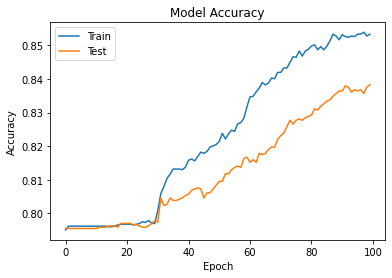

In [19]:
# List all data in history
print(model.history.keys())

# Summarize the history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show();

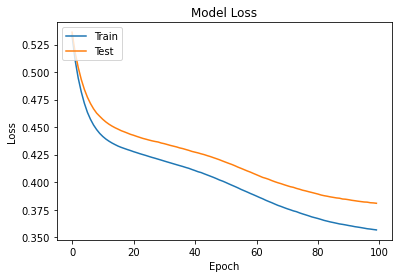

In [20]:
# Summarize the history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show();

### Prediction and Evaluation

In [21]:
# Predicting the test set result

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [23]:
# Making the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 220  185]]


In [24]:
# Calculating the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.854


### Hyperparameter Optimization

In [43]:
# Importing the libraries

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid 

In [44]:
# Creating our custom function

def create_model(layers, activation):
  model = Sequential()
  for i, nodes in enumerate(layers):
    if i ==0:
      model.add(Dense(nodes, input_dim = X_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))

    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))

  model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #Note: No activation beyond this point

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [45]:
model1 = KerasClassifier(build_fn = create_model, verbose = 0)

In [46]:
# GridSearchCV

layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']

param_grid = dict(layers = layers, activation = activations, batch_size = [128, 256], epochs = [30])

grid = GridSearchCV(estimator = model1, param_grid = param_grid, cv = 5)

In [47]:
# Fitting the model

grid_result = grid.fit(X_train, y_train)

In [48]:
grid_result.best_score_

0.856374990940094

In [49]:
grid_result.best_params_

{'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [45, 30, 15]}

In [50]:
# Prediction and Evaluation

pred_y = grid.predict(X_test)
pred_y = (pred_y > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred_y)
print(cm)

score = accuracy_score(y_test, pred_y)
print(score)

[[1525   70]
 [ 207  198]]
0.8615
